# Assignment - Process Models

The notion of *degree of belief* is central to scientific thinking. It is somehow a part of our human nature to believe statements that have little to no supporting evidence. Another way of thinking about the amount of available evidence is that it is the process of quantifying uncertainty.  The notion of a degree of belief can be formalized using [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). For your reference here is a paper that [discusses the notion of degree of belief](https://www.sciencedirect.com/topics/mathematics/degree-of-belief).

For this assignment it suffices to know that with more evidence available, ideally in the form of repeated independent experiments, ones degree of belief should change. Evidence is derived from the scientific process and if we have none to beging with then we are stuck at the question stage and a proper scientific hypothesis cannot be made.  Recall the scientific process.

1. Formulate the question
>Does Colorado have better skiing than Utah?
2. Generate a hypothesis to address the question
>It is commonly said that fresh powder is essential for better skiing.  Not knowing which state has more snowfall on average we hypothesize that the average amount of fresh snow between Colorado and Utah are different.
3. Make a prediction
4. Conduct an experiment
5. Analyze the data and draw a conclusion

We are going to step through the scientific process in this assignment using the above stated hypothesis.  There are ways using experimentation (surveys, blinded studies etc) to test if one state has better skiing more directly, but **the hypothesis should be written in a way that is appropriate given the available data**.  So let's load the data for a ski resort in Colorado and another in Utah.

In [67]:
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline

In [98]:
snowbird = pd.read_csv("../data/snowbird-UT.csv")
telluride = pd.read_csv("../data/telluride-CO.csv")

## Question 1

Make a prediction.  Before you run your experiment you should write down what you know about the problem.  In practice this step is often carried out with a domain expert or someone that has detailed knowledge of the business opportunity.

The snowfall between resorts will be different.

## Question 2

Explore the data.

In [122]:
telluride.head(10),snowbird.head(10)
# different dates (only when snow fell?)
telluride.describe(),snowbird.describe()
telluride.max(),snowbird.max()
telluride.min(),snowbird.min()

(Date                      1-Apr-09
 24 hr New Snow               10 cm
 Season Snowfall Total        10 cm
 Base Depth                    0 cm
 Resort                   Telluride
 dtype: object, Date                     1-Apr-09
 24 hr New Snow              10 cm
 Season Snowfall Total       10 cm
 Base Depth                   0 cm
 Resort                   Snowbird
 dtype: object)

## Question 3

For visualization, hypothesis testing and many types of modeling efforts it is often convenient if the input data takes the form of a single Pandas data frame or NumPy array.  Combine the two data frames into a single container and ensure that there is a column to indicate the resort. 

* [merge and concatenate in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [145]:
## your code here
telluride["Resort"] = "Telluride"
snowbird["Resort"] = "Snowbird"
resorts = telluride.append(snowbird)
resorts.head()

,Date,24 hr New Snow,Season Snowfall Total,Base Depth,Resort
0,1-Jan-17,3 cm,3 cm,91 cm,Telluride
1,2-Jan-17,8 cm,11 cm,94 cm,Telluride
2,3-Jan-17,3 cm,14 cm,91 cm,Telluride
3,4-Jan-17,3 cm,17 cm,94 cm,Telluride
4,5-Jan-17,10 cm,27 cm,99 cm,Telluride


## Question 4

Visualization by simple plots and by tabular summaries is central to the investigative process in data science.  Use both a tabular summary and a simple plot to compare the two resorts.

* [pivot tables in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
* [simple plots in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [146]:
## your code here
def left(s):
    return s[:len(s)-3]

resorts["24 hr New Snow"] = pd.to_numeric(resorts["24 hr New Snow"].apply(left))
resorts["Season Snowfall Total"] = pd.to_numeric(resorts["Season Snowfall Total"].apply(left))
resorts["Base Depth"] = pd.to_numeric(resorts["Base Depth"].apply(left))

resorts["Date"] = pd.to_datetime(resorts["Date"])


In [165]:
pivot = resorts.pivot(index='Date', columns='Resort', values='24 hr New Snow').fillna(0)

pivot.describe()

Resort,Snowbird,Telluride
count,706.000000,706.000000
mean,12.932011,6.651558
std,13.060293,9.126556
min,0.000000,0.000000
25%,3.000000,0.000000
50%,8.000000,3.000000
75%,20.000000,10.000000
max,64.000000,56.000000


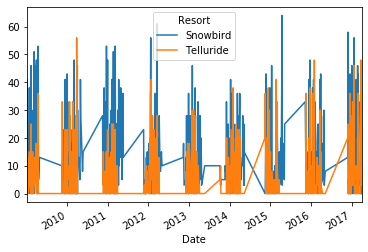

In [156]:
pivot.plot()

The other important side to degree of belief is that it never caps out at 100 percent certainty. Some hypotheses have become laws like [Newton’s Law of Gravitation](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation), but most natural phenomena in the world outside of physics cannot be explained as a law.

A hypothesis is the simplest explanation of a phenomenon. A scientific theory is an in-depth explanation of the observed phenomenon. Do not be mistaken with the word theory. There can be sufficient evidence that your degree of belief all but touches 100%, and is sufficient for decision-making purposes. A built-in safeguard for scientific thought is that our degree of belief never reaches 100%, which leaves some room to find new evidence that could move the dial in the other direction.

## Question 5

There are many ways to carry out hypothesis tests when it comes to these types of data.  A simple t-test,  permutation test, Fisher's exact test and more can be used. In practice you would identify the test you want to use **before** collecting the data.  Use any hypothesis test your would like to test your original hypothesis.

In [162]:
from scipy.stats import ttest_ind

telluride = resorts[resorts["Resort"] == "Telluride"]
snowbird = resorts[resorts["Resort"] == "Snowbird"]

ttest_ind(telluride['24 hr New Snow'],snowbird['24 hr New Snow'])

Ttest_indResult(statistic=-5.388883085199097, pvalue=8.862117507175997e-08)

## Question 6

Clearly state your conclusion based on the experiment that you have just run.

It is extremely likely that the snowfall varies between Telluride and Snowbird.

### more on the scientific method

Outside of carefully wording your hypotheses and conclusions there are additional factors like external peer review that help ensure the integrity of the scientific method. In the case of implementing a model for a specific business task, this could mean assigning reviewers for a pull request, pair programming or simply asking other qualified individuals to check over your work.

## Extra credit

There are a few other ski resorts in the data file.  You can sharpen your skills by incorporating them into a broader comparison.

In [34]:
## your code here

!ls ../data

jackson_hole-WY.csv  snowbird-UT.csv   whistler_blackcomb-BC.csv
README.md	     telluride-CO.csv
